# Lecture 9

Ci proponiamo di risolvere il problema del commesso viaggiatore (TSP: Travaling Salesman Problem) mediante l'utilizzo di un Algoritmo Genetico (GA).

Il TSP consiste nel trovare il percorso più breve tra $N$ città, visitandole tutte una sola volta e tornando infine alla città di partenza. Per fare ciò, date le coordinate delle città $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, si cerca di minimizzare il funzionale costo, che qui cosideriamo essere la lunghezza totale del percorso $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)=\sum_{i=1}^{N}|\vec{x}_i-\vec{x}_{i+1}|$, dove l'indice $N+1$ si intende uguale a $1$.
In generale, un percorso sarà dato da $\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N=\vec{c}_{P1}, \vec{c}_{P2}, \dots, \vec{c}_{PN}$ dove $P$ è una permutazione generica degli indici.
Fissiamo inoltre arbitrariamente la prima città, che resta il punto di partenza e di arrivo durante tutta la simulazione.

L'Algoritmo Genetico implementato si basa sul fatto che ogni possibile cammino è rappresentato da un vettore di interi, che indicano l'ordine in cui le singole città vengono visitate. A ogni individuo è associato un cammino; tanti individui vanno a costituire una generazione. L'Algoritmo Genetico si occupa di far "evolvere" le generazioni grazie alle interazioni dei singoli individui tra loro, permesse dal fenomeno di Crossover (associato alla sua probabilità  $p_{cross}$ di avvenire) e mediante diversi tipi di mutazioni (legate anch'esse alla probabilità di avvenire $p_{mut}$) :
1. Pair permutation (scambio di due città tra loro)
2. Block permutation (scambio di due blocchi di città della stessa lunghezza contigui nel percorso)
3. Shift (slittamento di un blocco di città contigue di un certo numero di posizioni)
4. Inversion (inversione dell'ordine di un certo numero di città contigue)

Nel processo di evoluzione si tiene conto di quali percorsi siano più brevi e quindi migliori (con un alto grado di Fitness), e si fa in modo che diventi più probabile la loro possibilità di replicarsi. Per fare ciò, si ordina la popolazione secondo il grado di Fitness posseduto, per poi far sì che l'algoritmo di selezione adoperato privilegi i primi elementi della lista per essere selezionati per eventuali mutazioni/crossover e per costituire così la generazione successiva, più adatta della precedente. Nel nostro caso, abbiamo utilizzato per la scelta del percorso (e quindi dell'individuo $j$) da selezionare l'algoritmo $j=N\times int(r^p)$ con $r\in[0,1)$ uniformemente estratto e $p$ un certo esponente.

Per il nostro specifico problema legato alla visita di $N=32$ città, ho scelto di considerare $1600$ generazioni composte ognuna da $530$ individui, avendo cercato di variare tali valori per ottenere i percorsi più brevi possibile. Fissiamo poi $p=3$, $p_{mut}=0.07$ e $p_{cross}=0.7$.

La scelta dei parametri è stata basata su considerazioni relative al funzionamento del GA:
- $p$: per quanto riguarda il parametro che regola la selezione, dobbiamo considerare che un'evoluzione poco selettiva potrebbe impiegare un tempo molto lungo ad arrivare a una buona popolazione, ma un'evoluzione troppo selettiva potrebbe ridurre la diversità impedendo quindi eventuali miglioramenti
- $p_{mut}$: nello scegliere la probabilità di mutazione, dobbiamo considerare che da una parte le mutazioni consentono di esplorare un numero maggiore di possibilità e quindi promuovono la diversità, evitando il blocco dell'evoluzione ad una precisa configurazione, dall'altra possono avere effetti distruttivi per la fitness di una popolazione, se troppo frequenti
- $p_{cross}$: anche in questo caso valgono le stesse considerazioni fatte per le mutazioni 

La scelta dei valori va dunque ponderata e si fonda su un delicato equilibrio tra tutti questi fattori.

## Città su una circonferenza

Nel primo caso, le città che il viaggiatore deve visitare sono tutte disposte (casualmente) su una circonferenza, che ho fissato avere raggio $r=1$. 
Di seguito i grafici che riportano la lunghezza del percorso migliore e della media dei percorsi migliori eseguita sulla migliore metà della popolazione considerata, in funzione del numero di generazioni; infine, il plot del percorso migliore trovato con l'Algoritmo Genetico.

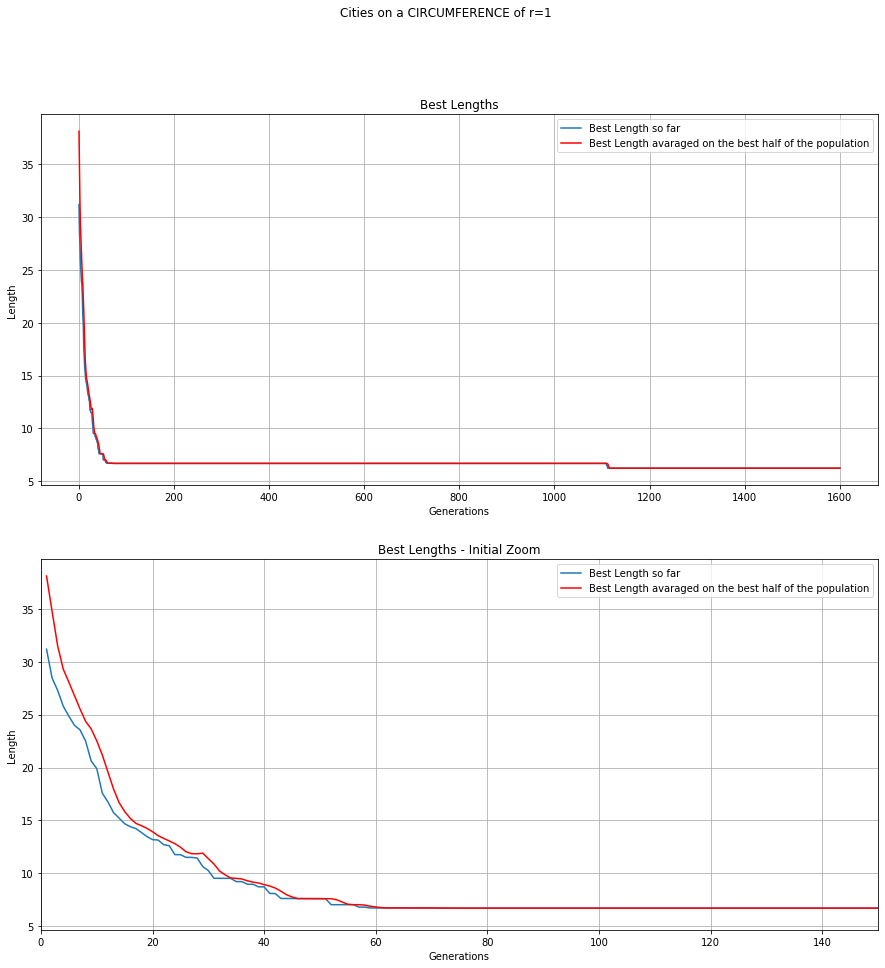

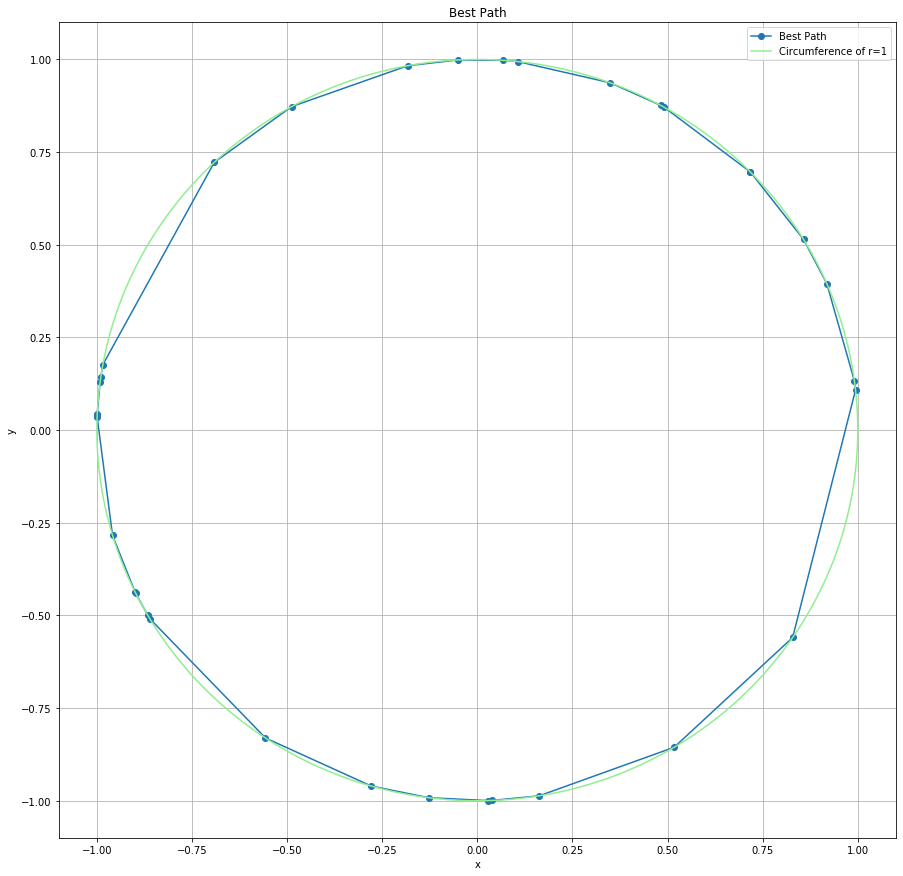

Length of the Best Path:  6.2403


In [1]:
import numpy as np
import matplotlib.pyplot as plt

c_best,c_ave=np.loadtxt("CIRCLE_fitness.dat", usecols=(0,1), delimiter="   ", unpack='true')
c_x,c_y=np.loadtxt("CIRCLE_bestpath.dat", usecols=(0,1), delimiter="   ", unpack='true')
c_gen=np.linspace(1,1600,1600)

fig, (plt1, plt2) = plt.subplots(2, 1,  figsize=(15, 15))
fig.suptitle("Cities on a CIRCUMFERENCE of r=1")

plt1.plot(c_gen,c_best,label="Best Length so far")
plt1.plot(c_gen,c_ave,label="Best Length avaraged on the best half of the population", color='red')
plt1.legend(loc='upper right')
plt1.set_title("Best Lengths")
plt1.set_xlabel("Generations")
plt1.set_ylabel("Length")
plt1.grid(True)

plt2.plot(c_gen,c_best,label="Best Length so far")
plt2.plot(c_gen,c_ave,label="Best Length avaraged on the best half of the population", color='red')
plt2.legend(loc='upper right')
plt2.set_title("Best Lengths - Initial Zoom")
plt2.set_xlabel("Generations")
plt2.set_ylabel("Length")
plt2.set_xlim((0,150))
plt2.grid(True)

fig=plt.figure (figsize=(15,15))
theta=np.linspace(0,2*np.pi,500)
radius=1
x=radius*np.cos(theta)
y=radius*np.sin(theta)
plt.plot(c_x,c_y,'-o',label='Best Path')
plt.plot(x,y,label='Circumference of r=1', color='lightgreen')
plt.legend(loc='upper right')
plt.title("Best Path")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

plt.show()
print("Length of the Best Path: ", c_best[-1])

Il secondo grafico riportato non è altro che un ingrandimento del primo per poter visualizzare meglio le due curve. Di fatto, sia la lunghezza del percorso migliore sia la lunghezza mediata sulla metà migliore della popolazione si stabilizzano su un valore preciso già dopo circa $100$ evoluzioni da una generazione precedente ad una successiva. 
Notiamo poi che il percorso migliore trovato dal GA segue effettivamente, come atteso, la forma della circonferenza e la sua lunghezza $L_{best}=6.2403$ è confrontabile con la lunghezza di una circonferenza di raggio $1$, che sarebbe $L=2\pi R\approx 6.28$ (chiaramente leggermente inferiore, dovendo considerare un numero finito di punti).

## Città in un quadrato

Consideriamo ora le nostre città da visitare distribuite casualmente all'interno di un quadrato di lato fissato $L=2$.
Di seguito i grafici che riportano la lunghezza del percorso migliore e della media dei percorsi migliori eseguita sulla migliore metà della popolazione considerata, in funzione del numero di generazioni; infine, il plot del percorso migliore trovato con l'Algoritmo Genetico.

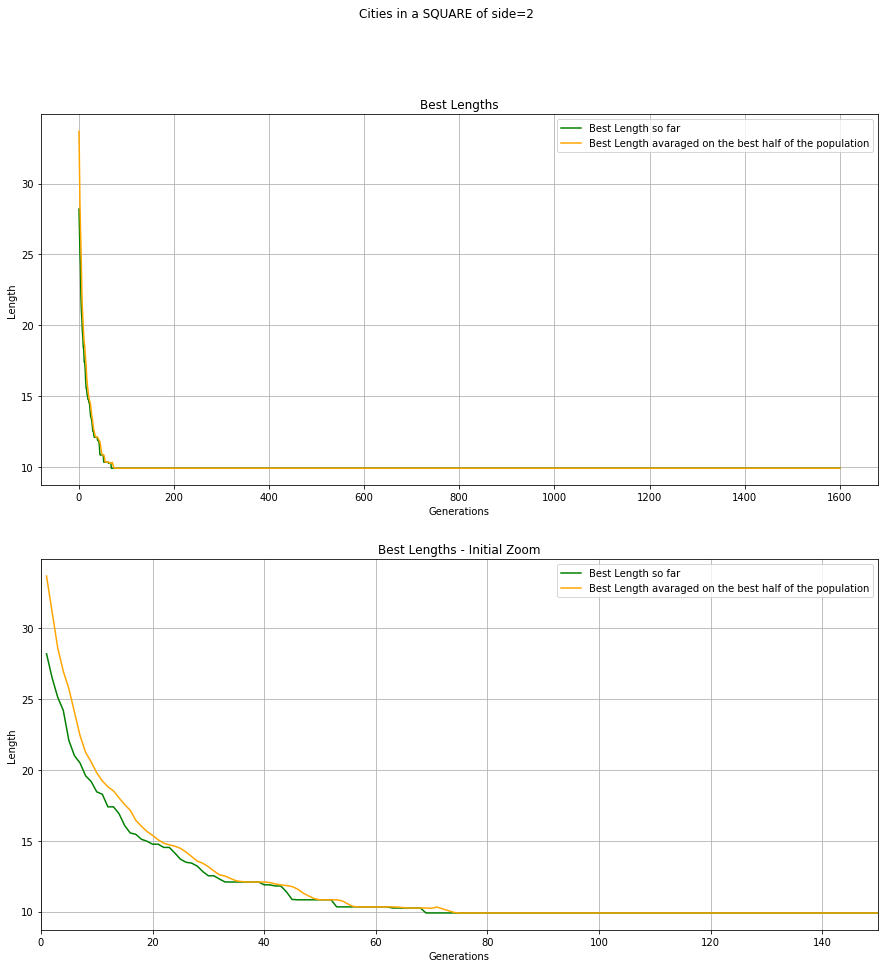

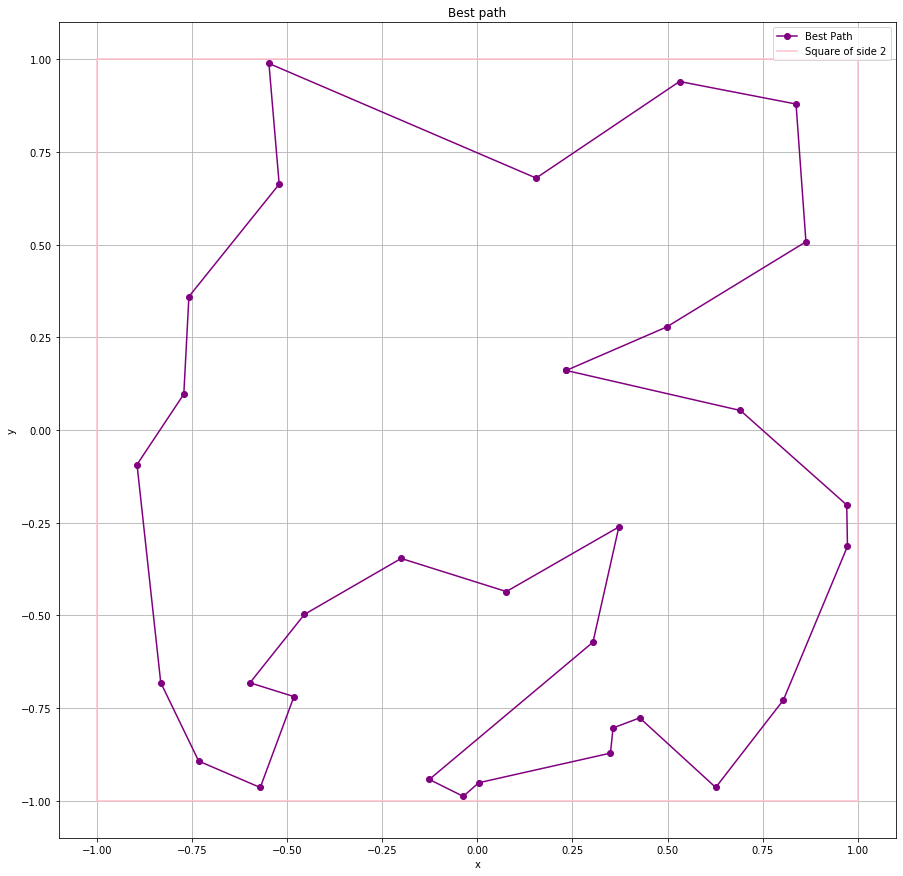

Length of the Best Path:  9.8983


In [2]:
import numpy as np
import matplotlib.pyplot as plt

c_best,c_ave=np.loadtxt("SQUARE_fitness.dat", usecols=(0,1), delimiter="   ", unpack='true')
c_x,c_y=np.loadtxt("SQUARE_bestpath.dat", usecols=(0,1), delimiter="   ", unpack='true')
c_gen=np.linspace(1,1600,1600)

fig, (plt1, plt2) = plt.subplots(2, 1,  figsize=(15, 15))
fig.suptitle("Cities in a SQUARE of side=2")

plt1.plot(c_gen,c_best,label="Best Length so far", color='green')
plt1.plot(c_gen,c_ave,label="Best Length avaraged on the best half of the population", color='orange')
plt1.legend(loc='upper right')
plt1.set_title("Best Lengths")
plt1.set_xlabel("Generations")
plt1.set_ylabel("Length")
plt1.grid(True)

plt2.plot(c_gen,c_best,label="Best Length so far", color='green')
plt2.plot(c_gen,c_ave,label="Best Length avaraged on the best half of the population", color='orange')
plt2.legend(loc='upper right')
plt2.set_title("Best Lengths - Initial Zoom")
plt2.set_xlabel("Generations")
plt2.set_ylabel("Length")
plt2.set_xlim((0, 150))
plt2.grid(True)


fig=plt.figure (figsize=(15,15))
plt.plot(c_x,c_y,'-o',label='Best Path', color='purple')
x_left=np.linspace(-1,1,100)
x_right=np.linspace(-1,1,100)
for i in range(100):
    x_left[i]=-1
    x_right[i]=+1
x=np.linspace(-1,1,100)
plt.plot(x,x_left,color='pink',label='Square of side 2')
plt.plot(x,x_right,color='pink')
plt.plot(x_right,x,color='pink')
plt.plot(x_left,x,color='pink')
plt.legend(loc='upper right')
plt.title("Best path")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)


plt.show()
print("Length of the Best Path: ", c_best[-1])

Di nuovo, il secondo grafico riportato non è altro che un ingrandimento del primo per poter visualizzare meglio le due curve. Anche in questo caso vediamo che sia la lunghezza del percorso migliore sia la lunghezza mediata sulla metà migliore della popolazione si stabilizzano su un valore preciso già dopo circa $100$ evoluzioni da una generazione precedente ad una successiva. 